In [169]:
import os
import glob
import uproot
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy.optimize import curve_fit
import mplhep as hep
plt.style.use(hep.style.CMS)
#import yahist
from tqdm import tqdm
pd.set_option('display.max_columns', None)
from tqdm import tqdm
pd.set_option('display.max_rows', 500)

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [170]:
filename = "startup_numEvent1000" #"aged" #"startup" #"aged"
simType = "@ Startup" #"Startup" #"EOL" 

inputDir = '/afs/cern.ch/work/m/mmazza/private/projects/HGCElectronicsValidation/CMSSW_14_1_0_pre4/src/UserCode/HGCElectronicsValidation/'
plot_dir = "plots/"+filename+"/layers2D"
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)    
    

In [171]:
histo_base_names = ["hXYhits_HECback", "hGlobXYhits_HECback"]
layers = range(7, 23)


In [172]:
file = ROOT.TFile.Open(inputDir+filename+'.root', "READ")
if not file or file.IsZombie():
    print(f"Error opening file: {file_name}")

In [173]:
from ROOT import gROOT

# Set TDR styles
gROOT.LoadMacro("tdrstyle.C")
gROOT.ProcessLine("setTDRStyle();")

0

In [174]:

#import sys
#sys.path.insert(0,'/afs/cern.ch/user/m/mmazza/private/rootUtils_new')
import CMS_lumi, tdrstyle #check if it works from private/rootutils
tdrstyle.setTDRStyle()

In [177]:
for histo_base_name in histo_base_names:
    
    histo_base_name1 = histo_base_name+"_Sipm2mm_L"
    histo_base_name2 = histo_base_name+"_Sipm4mm_L"
    legend1 = "SiPM 4mm"
    legend2 = "SiPM 2mm"
    
    for layer in layers:
        
        histo_name1 = f"{histo_base_name1}{layer}"
        histo_name2 = f"{histo_base_name2}{layer}"

        # Retrieve the histograms
        histo1 = file.Get("ana/"+histo_name1)
        histo2 = file.Get("ana/"+histo_name2)

        if not histo1 or not histo2:
            print(f"Error retrieving histograms: {histo_name1} or {histo_name2}")
            continue

        # Create a canvas for this layer
        canvas = ROOT.TCanvas(f"c{layer}", f"Layer {layer}", 500, 500)
        
        # Draw the histograms
        histo1.SetLineColor(ROOT.kMagenta)
        histo1.SetMarkerColor(ROOT.kMagenta)
        histo2.SetMarkerColor(ROOT.kBlue)
        histo1.SetTitle(f"Layer {layer}")
        if "Glob" in histo_base_name:
            histo1.GetXaxis().SetTitle("Global x")
            histo1.GetYaxis().SetTitle("Global y")
        else:
            histo1.GetXaxis().SetTitle("iradius")
            histo1.GetYaxis().SetTitle("iradius")
        histo1.Draw("HIST")
        histo2.Draw("HIST SAME")
        
        # Add a title on top of the frame
        latex = ROOT.TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.035)    
        latex.SetTextAlign(13) 
        latex.DrawLatex(0.2, 0.9, f"Layer {layer}")

        # Add a legend
        legend = ROOT.TLegend(0.6, 0.8, 0.95, 0.95)
        legend.AddEntry(histo1, legend1, "l")
        legend.AddEntry(histo2, legend2, "l")
        legend.SetBorderSize(0);
        legend.SetFillStyle(0);
        legend.SetTextFont(42);
        #legend.SetTextSize(300);
        legend.Draw()

        canvas.Draw()
        # Save the canvas as a PDF file
        output_file = f"{plot_dir}/{histo_base_name}_L{layer}.pdf"
        canvas.SaveAs(output_file)


Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L7 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L7
Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L8 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L8
Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L9 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L9
Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L10 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L10
Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L11 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L11
Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L12 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L12
Error retrieving histograms: hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm2mm_L13 or hGlobXYhits_HECback_detIdMissingFromMap_L_Sipm4mm_L13
Error retrieving histogram

Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L7.pdf has been created
Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L8.pdf has been created
Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L9.pdf has been created
Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L10.pdf has been created
Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L11.pdf has been created
Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L12.pdf has been created
Info in <TCanvas::Print>: pdf file plots/startup_numEvent1000/layers2D/hGlobXYhits_HECback_detIdMissingFromMap_L_L13.pdf has been created
Info in <TCanvas::Print>: pdf file pl

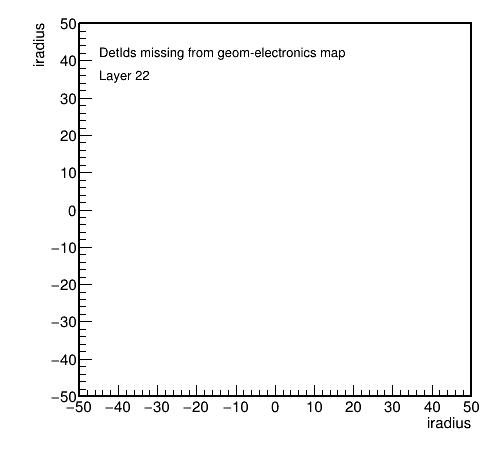

In [176]:
histo_base_names = ["hGlobXYhits_HECback_detIdMissingFromMap_L", "hXYhits_HECback_detIdMissingFromMap_L"]
for histo_base_name in histo_base_names:
    
    for layer in layers:
        
        histo_name1 = f"{histo_base_name}{layer}"

        # Retrieve the histograms
        histo1 = file.Get("ana/"+histo_name1)

        if not histo1:
            print(f"Error retrieving histograms: {histo_name1}")
            continue

        # Create a canvas for this layer
        canvas = ROOT.TCanvas(f"c{layer}", f"Layer {layer}", 500, 500)
        
        # Draw the histograms
        histo1.SetLineColor(ROOT.kRed)
        histo1.SetMarkerColor(ROOT.kRed)
        histo1.SetTitle(f"Layer {layer}")
        if "Glob" in histo_base_name:
            histo1.GetXaxis().SetTitle("Global x")
            histo1.GetYaxis().SetTitle("Global y")
        else:
            histo1.GetXaxis().SetTitle("iradius")
            histo1.GetYaxis().SetTitle("iradius")
            
        histo1.Draw("HIST")

        # Add a legend
#         legend = ROOT.TLegend(0.6, 0.8, 0.95, 0.95)
#         legend.AddEntry(histo1, histo_name1, "l")
#         legend.AddEntry(histo2, histo_name2, "l")
#         legend.SetBorderSize(0);
#         legend.SetFillStyle(0);
#         legend.SetTextFont(42);
#         #legend.SetTextSize(300);
#         legend.Draw()

       # Add a title on top of the frame
        latex = ROOT.TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.03)    
        latex.SetTextAlign(13) 
        latex.DrawLatex(0.2, 0.9, f"DetIds missing from geom-electronics map")
        latex.DrawLatex(0.2, 0.85, f"Layer {layer}")

        canvas.Draw()
        # Save the canvas as a PDF file
        output_file = f"{plot_dir}/{histo_base_name}_L{layer}.pdf"
        canvas.SaveAs(output_file)



In [23]:
import ROOT
from ROOT import TCanvas, gPad, TFile

In [6]:
with uproot.open(infile) as f:  
    h = f["ana/hRPhiHits_HECback_polar_L10"]

In [24]:
f = TFile.Open(infile)
f.cd()
h = f.Get("ana/hRPhiHits_HECback_polar_L10")
h.SetDirectory(0)

In [25]:
# Function to get bin edges
def get_bin_edges(axis):
    edges = []
    n_bins = axis.GetNbins()
    for i in range(1, n_bins + 2):
        edges.append(axis.GetBinLowEdge(i))
    return edges

In [26]:
# Convert polar coordinates to Cartesian coordinates
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [68]:
def draw_polar_bin_edges(c, hist):
    c.cd()
    theta_edges = get_bin_edges(hist.GetXaxis())
    print(theta_edges)
    r_edges = get_bin_edges(hist.GetYaxis())

    print(r_edges)
    # Ensure theta_edges are in radians
    theta_edges = [theta * np.pi / 180 for theta in theta_edges]

    for i in range(len(r_edges) - 1):
        for j in range(len(theta_edges) - 1):
            r1 = r_edges[i]
            r2 = r_edges[i + 1]
            theta1 = theta_edges[j]
            theta2 = theta_edges[j + 1]

            # Draw the radial lines
            x1, y1 = polar_to_cartesian(r1, theta1)
            x2, y2 = polar_to_cartesian(r2, theta1)
            x3, y3 = polar_to_cartesian(r2, theta2)
            x4, y4 = polar_to_cartesian(r1, theta2)

            radial_line1 = ROOT.TLine(x1, y1, x2, y2)
            radial_line1.SetLineColor(ROOT.kRed)
            radial_line1.SetLineWidth(1)
            radial_line1.Draw("L same")
            print(f"{x1}, {y1}, {x2}, {y2}")

            radial_line2 = ROOT.TLine(x4, y4, x3, y3)
            radial_line2.SetLineColor(ROOT.kRed)
            radial_line2.SetLineWidth(1)
            radial_line2.Draw("L same")

            # Draw the arcs
            arc1 = ROOT.TArc(0, 0, r1, theta1 * 180 / np.pi, theta2 * 180 / np.pi)
            arc1.SetLineColor(ROOT.kRed)
            arc1.SetLineWidth(1)
            arc1.Draw("same")

            arc2 = ROOT.TArc(0, 0, r2, theta1 * 180 / np.pi, theta2 * 180 / np.pi)
            arc2.SetLineColor(ROOT.kRed)
            arc2.SetLineWidth(1)
            arc2.Draw("same")

In [70]:
# did not work
# c = TCanvas("c","c",800,1200)
# c.cd()
# gPad.DrawFrame(-50, -50,50, 50);
# h.Draw("same colz pol");
# draw_polar_bin_edges(c, h)
# radial_line1 = ROOT.TLine(33.88413973333118, -35.395834140928045, 34.57565278911345, -36.118198102987805)
# radial_line1.SetLineColor(ROOT.kRed)
# radial_line1.SetLineWidth(1)
# radial_line1.Draw("L same")
# c.Update()
# c.Draw()
# c.SaveAs("test.png")